In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [12]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,9305-CDSKC,0,0,0,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
6,1452-KIOVK,1,0,0,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,0
7,6713-OKOMC,0,0,0,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,0
8,7892-POOKP,0,0,1,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
9,6388-TABGU,1,0,0,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0


In [4]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


gender: Female=0, Male=1

Partner: No=0, Yes=1

Churn: No=0, Yes=1

In [10]:

le = LabelEncoder()
for col in ['gender', 'Partner', 'Churn']:
    data[col] = le.fit_transform(data[col])


In [16]:
data=data.drop(columns=['customerID'])

In [17]:
data['SeniorCitizen'].unique()

array([0, 1])

In [24]:
data['TotalCharges']=data['TotalCharges'].replace({" ":"0.0"})

In [26]:
data['TotalCharges']=data['TotalCharges'].astype(float)

In [28]:
data['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


In [29]:
data.describe()

,gender,SeniorCitizen,Partner,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,32.371149,64.761692,2279.734304,0.265370
std,0.500013,0.368612,0.499748,24.559481,30.090047,2266.794470,0.441561
min,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,35.500000,398.550000,0.000000
50%,1.000000,0.000000,0.000000,29.000000,70.350000,1394.550000,0.000000
75%,1.000000,0.000000,1.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,72.000000,118.750000,8684.800000,1.000000


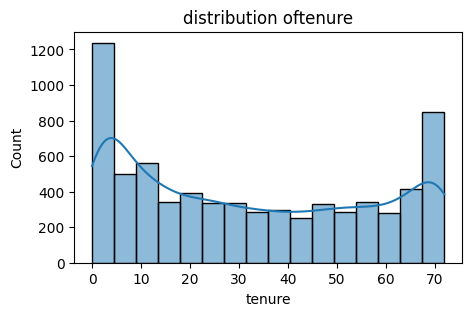

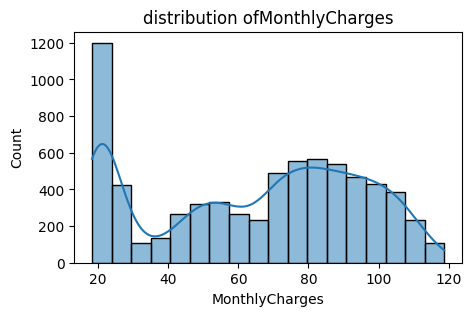

In [35]:
def ploty(data,col):
   plt.figure(figsize=(5,3))
   sns.histplot(data[col],kde=True)
   plt.title(f"distribution of{col}")
   plt.show()
ploty(data,'tenure')
ploty(data,'MonthlyCharges')

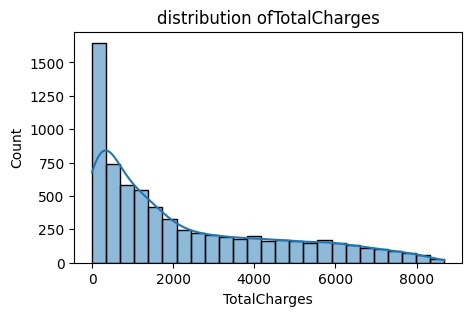

In [36]:
ploty(data,'TotalCharges')

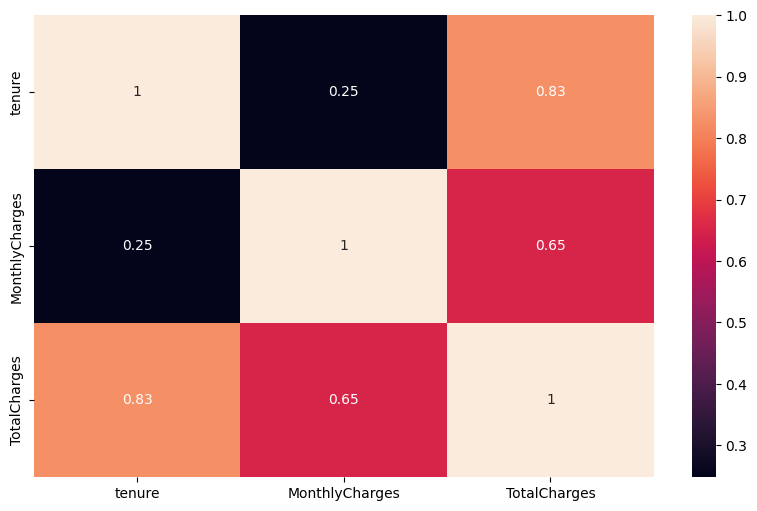

In [38]:
plt.figure(figsize=(10,6))
sns.heatmap(data[['tenure','MonthlyCharges','TotalCharges']].corr(),annot=True)
plt.show()


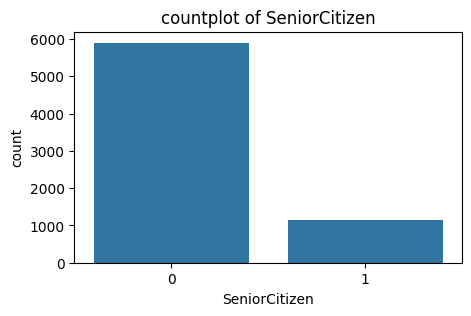

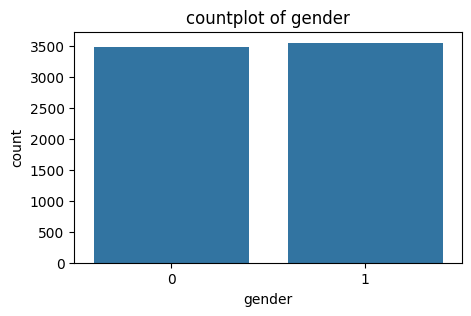

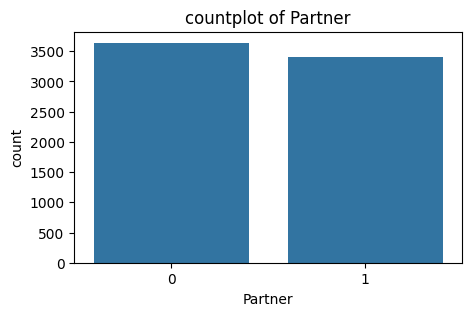

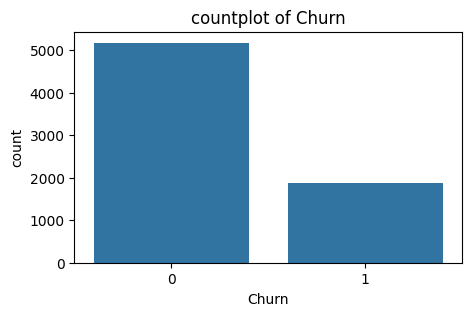

In [43]:
def ploty1(data,col):
   plt.figure(figsize=(5,3))
   sns.countplot(x=data[col])
   plt.title(f"countplot of {col}")
   plt.show()
ploty1(data,'SeniorCitizen')
ploty1(data,'gender')
ploty1(data,'Partner')
ploty1(data,'Churn')

In [44]:
obj_col=data.select_dtypes(include="object").columns

In [46]:
encoders={}
for col in obj_col:
    data[col]=le.fit_transform(data[col])


In [47]:
data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [74]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,r2_score,classification_report, confusion_matrix


In [75]:
X=data.drop(columns=['Churn'])
y=data['Churn']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
sc=StandardScaler()
x_train_new=sc.fit_transform(x_train)
x_test_new=sc.transform(x_test)
lr=LogisticRegression()
lr.fit(x_train_new,y_train)
y_pred=lr.predict(x_test_new)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


0.815471965933286
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



as data is imbalanced no churn is significantly more than churn we do synthetic minority over sampling

In [76]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [77]:
smote=SMOTE(random_state=42)
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)


In [78]:
models={
    "Decision Tree":DecisionTreeClassifier(random_state=42),
    "Random Forest":RandomForestClassifier(random_state=42),
    "XGboost":XGBClassifier(random_state=42)
}

In [81]:
cv_scores={}
for model_name,model in models.items():
   print(f"Training {model_name}  with default parameters")
   scores=cross_val_score(model,x_train_smote,y_train_smote,cv=5,scoring="accuracy")
   cv_scores[model_name]=scores
   print(f"{model_name} corss val score {np.mean(scores):2f}")


Training Decision Tree  with default parameters
Decision Tree corss val score 0.777803
Training Random Forest  with default parameters
Random Forest corss val score 0.840758
Training XGboost  with default parameters
XGboost corss val score 0.830973
